In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_kddcup99, load_shuttle, fetch_covtype
from sklearn.preprocessing import LabelBinarizer
import logging
logging.basicConfig()

In [2]:
np.random.seed(1)

In [3]:
logfile = open('logon.vector.csv', 'r')
X = []
while 1:
    logline = logfile.readline().replace('\n', '').replace(' ', '')
    if logline == "":
        break
    records = logline.split(",")
    print records
    X.append(records)
logfile.close

['8', '17', '546.0', '2', '0']
['8', '17', '542.0', '2', '0']
['8', '17', '546.0', '2', '0']
['8', '17', '536.0', '2', '0']
['8', '17', '553.0', '2', '0']
['8', '17', '545.0', '2', '0']
['8', '17', '547.0', '2', '0']
['8', '17', '534.0', '2', '0']
['8', '17', '537.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '562.0', '2', '0']
['8', '17', '541.0', '2', '0']
['8', '17', '542.0', '2', '0']
['8', '17', '548.0', '2', '0']
['8', '17', '547.0', '2', '0']
['8', '17', '548.0', '2', '0']
['8', '17', '529.0', '2', '0']
['8', '17', '529.0', '2', '0']
['8', '17', '540.0', '2', '0']
['8', '17', '565.0', '2', '0']
['8', '17', '551.0', '2', '0']
['8', '17', '557.0', '2', '0']
['8', '17', '550.0', '2', '0']
['8', '18', '557.0', '2', '0']
['8', '17', '545.0', '2', '0']
['8', '17', '554.0', '2', '0']
['8', '17', '531.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '549.0', '2', '0']
['8', '17', '563.0', '2', '0']
['8', '17', '557.0', '2', '0']
['8', '17', '553.0', '2', '0']
['8', '1

<function close>

In [4]:
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0]

In [5]:
n_samples, n_features = np.shape(X)
n_samples_train = n_samples // 2
n_samples_test = n_samples - n_samples_train

In [6]:
n_samples, n_features

(146, 5)

In [7]:
X_train = X[:n_samples_train]
X_test = X[n_samples_test:]
y_train = y[:n_samples_train]
y_test = y[n_samples_test:]

In [8]:
np.shape(X_train)

(73, 5)

In [9]:
model = IsolationForest(bootstrap=True, n_jobs=-1, max_features=1.0, max_samples=73)
model.fit(X_train)

IsolationForest(bootstrap=True, max_features=1.0, max_samples=73,
        n_estimators=100, n_jobs=-1, random_state=None, verbose=0)

In [10]:
scoring = model.predict(X_test)

In [11]:
scoring

array([ 0.49246849,  0.44512903,  0.43564508,  0.49999421,  0.52659485,
        0.51446993,  0.43343738,  0.53479551,  0.67810709,  0.43343738,
        0.49246849,  0.50110995,  0.67810709,  0.48532764,  0.61172115,
        0.44516757,  0.52659485,  0.50761265,  0.51446993,  0.50110995,
        0.52178977,  0.51287671,  0.78219046,  0.78134033,  0.44516757,
        0.49246849,  0.7046094 ,  0.59958613,  0.49246849,  0.49999421,
        0.52981594,  0.51446993,  0.50110995,  0.50110995,  0.49999421,
        0.82566465,  0.43343738,  0.44512903,  0.48907257,  0.53479551,
        0.48907257,  0.49057404,  0.50761265,  0.53383441,  0.56649368,
        0.48532764,  0.51446993,  0.44512903,  0.44512903,  0.49057404,
        0.44512903,  0.55757769,  0.7046094 ,  0.7046094 ,  0.7046094 ,
        0.44512903,  0.43564508,  0.7046094 ,  0.7046094 ,  0.44512903,
        0.48311385,  0.82566465,  0.51287671,  0.7046094 ,  0.48532764,
        0.44512903,  0.51287671,  0.48532764,  0.53479551,  0.52

In [15]:
for x, y, z in zip(X_test,y_test,scoring):
    if y == 1:
        print y,z,x

1 0.704609397344 ['1', '17', '994.0', '4', '0']
1 0.704609397344 ['8', '0', '944.0', '4', '0']
1 0.704609397344 ['6', '17', '689.0', '4', '0']
1 0.704609397344 ['0', '17', '1017.0', '4', '0']
1 0.825664649823 ['1', '18', '977.0', '4', '0']
1 0.704609397344 ['3', '17', '845.0', '4', '0']


In [16]:
for x, y, z in zip(X_test,y_test,scoring):
    if z > 0.7:
        print y,z,x

0 0.782190462846 ['8', '18', '554.0', '2', '0']
0 0.781340328606 ['8', '18', '558.0', '2', '0']
0 0.704609397344 ['8', '17', '566.0', '2', '0']
0 0.825664649823 ['8', '18', '569.0', '2', '0']
0 0.704609397344 ['8', '17', '567.0', '2', '0']
1 0.704609397344 ['1', '17', '994.0', '4', '0']
1 0.704609397344 ['8', '0', '944.0', '4', '0']
1 0.704609397344 ['6', '17', '689.0', '4', '0']
1 0.704609397344 ['0', '17', '1017.0', '4', '0']
1 0.825664649823 ['1', '18', '977.0', '4', '0']
1 0.704609397344 ['3', '17', '845.0', '4', '0']


The this algorithm can find out all true positives but output some false positives.

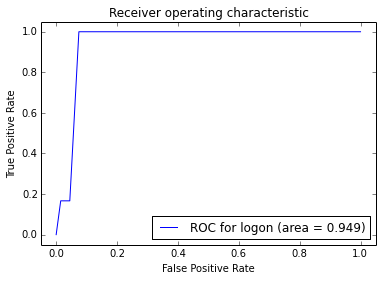

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, scoring)
AUC = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC for %s (area = %0.3f)' % ('logon', AUC))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()